In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm
from scipy.stats import f_oneway

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests
from scipy.stats import ttest_ind
from itertools import combinations

sns.set(color_codes =True)
sns.set(rc={'figure.figsize':(15,6)})
sns.set_palette("Set3")

## T-test
**Null Hypothesis (H₀):** The average test score is 80  
**Alternative Hypothesis (H₁):** The average test score is different from 80


In [2]:
import numpy as np

# Using NumPy to generate the array directly
# To use T-test the sample has to be less than 30
data = np.random.randint(70, 101, size=27)
data


hypothesized_mean = 80

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(data, hypothesized_mean)

# Significance level (alpha)
alpha = 0.05

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from the hypothesized mean.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude that the sample mean is different from the hypothesized mean.")

t-statistic: 3.145268133915396
p-value: 0.004124752671100029
Reject the null hypothesis: The sample mean is significantly different from the hypothesized mean.


## Z-score
**One Sample**

In [3]:
alpha = 0.05

In [4]:
possible_weight = np.arange(350, 500, 10)
barrel_weight = np.random.choice(possible_weight, size=50)
barrel_weight

array([390, 350, 470, 390, 390, 400, 420, 490, 400, 360, 360, 420, 470,
       480, 350, 420, 470, 400, 440, 400, 470, 430, 440, 370, 420, 380,
       410, 480, 380, 420, 430, 470, 450, 460, 370, 380, 480, 400, 390,
       350, 490, 450, 350, 450, 460, 480, 460, 490, 400, 380])

In [5]:
population_mean = 250

In [6]:
population_std = 10

In [7]:
sample_mean=np.mean(barrel_weight)
print(sample_mean)

421.2


In [8]:
sample_size = len(barrel_weight)
print(sample_size)

50


In [9]:
z_score = (sample_mean - population_mean) / (population_std)/np.sqrt(sample_size)
z_score

2.421133618782738

In [10]:
p_value = 2*(1-norm.cdf(abs(z_score)))
print(p_value)

0.015472188948254084


In [11]:
if p_value < alpha:
 print("Reject the null hypothesis: The sample mean is significantly different from the hypothesized mean.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude that the sample mean is different from the hypothesized mean.")

Reject the null hypothesis: The sample mean is significantly different from the hypothesized mean.


## One Way ANOVA 

In [12]:
bp_df = pd.read_excel("blood_pressure.xlsx")
bp_df.sample(5)

,Blood pressure,Drug
30,131,Drug B
22,129,Drug A
57,144,Drug B
29,132,Drug A
16,139,Drug A


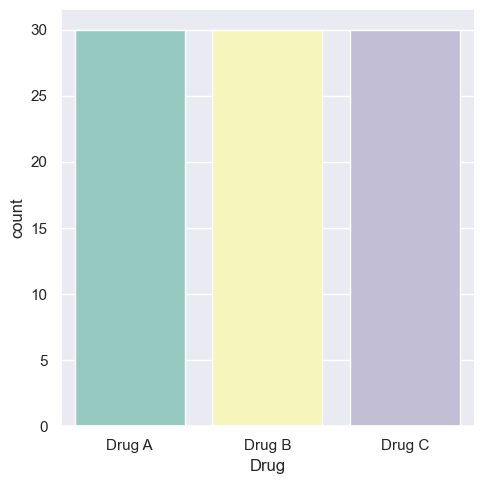

In [22]:
sns.catplot(data=bp_df, x="Drug", kind="count")
sns.despine()
plt.show()

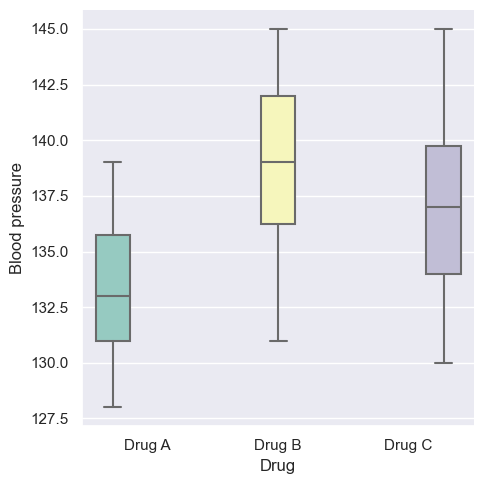

In [23]:
sns.catplot(data=bp_df, x="Drug", y="Blood pressure", hue="Drug", kind="box")
sns.despine()
plt.show()

In [15]:
bp_df.groupby('Drug').agg(['count', 'mean', 'median', 'std','min', 'max'])

Blood pressure                                       
                count        mean median       std  min  max
Drug                                                        
Drug A             30  133.266667  133.0  2.887946  128  139
Drug B             30  139.033333  139.0  3.986904  131  145
Drug C             30  137.000000  137.0  3.732430  130  145

## Levene test
**Tests the equality of variance**

In [16]:
group_a = bp_df[bp_df["Drug"] == "Drug A"]["Blood pressure"]
group_b = bp_df[bp_df["Drug"] == "Drug B"]["Blood pressure"]
group_c = bp_df[bp_df["Drug"] == "Drug C"]["Blood pressure"]

statistic, p_value = stats.levene(group_a, group_b,group_c)

print("Levene's statistic:", statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Variances are significantly different (violation of ANOVA assumption).")
else:
    print("No significant difference in variances (ANOVA assumption met).")

Levene's statistic: 1.739232257407596
P-value: 0.18170645077474307
No significant difference in variances (ANOVA assumption met).


In [17]:
# One-Way ANOVA
f_stat, p_value = f_oneway(group_a, group_b, group_c)

# Output the results
print("F-statistic:", f_stat)
print("P-value:", p_value)

# Interpret
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: At least one group mean is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between group means.")

F-statistic: 20.172052401746733
P-value: 6.346112123576863e-08
Reject the null hypothesis: At least one group mean is significantly different.


## Bonferroni- Corrected Post-Hoc Tests
**To find which specific groups differ**

In [18]:
groups = bp_df["Drug"].unique()

# Create pairwise combinations
pairs= list(combinations(groups,2))

# to store results
p_values = []
comparisons =[]

for g1, g2 in pairs:
    data1 = bp_df[bp_df["Drug"] == g1]["Blood pressure"]
    data2 = bp_df[bp_df["Drug"] == g2]["Blood pressure"]

    stat, p = ttest_ind(data1, data2)
    p_values.append(p)
    comparisons.append(f"{g1} vs {g2}")

# Apply Bonferroni correction
adjusted = multipletests(p_values, method='bonferroni')

for comp, raw_p, adj_p, reject in zip(comparisons, p_values,adjusted[1], adjusted[0]):
     print(f"{comp}: Raw p = {raw_p:.4f}, Bonferroni-adjusted p = {adj_p:.4f}, Reject H₀: {reject}")


Drug A vs Drug B: Raw p = 0.0000, Bonferroni-adjusted p = 0.0000, Reject H₀: True
Drug A vs Drug C: Raw p = 0.0001, Bonferroni-adjusted p = 0.0002, Reject H₀: True
Drug B vs Drug C: Raw p = 0.0460, Bonferroni-adjusted p = 0.1380, Reject H₀: False
